# Spectral Clustering Figure Generation

**Changelog Interval:** 5.8.23 - 6.5.23<br>
**Author:** Laura Kaplan & Louis Petingi <br>
**Purpose:** Generating Figures of Results<br>
**Resources Used:** 

<div class="alert alert-block alert-success">

----------------------------------
# LIBRARIES

In [46]:
import os
os.environ['MPLBACKEND'] = 'Agg'
import skimage.viewer

import networkx as nx
import seaborn as sns; sns.set()
import pylab
import pkg_resources
import types
import math
import gc 
import cv2
import random
from collections import Counter

#DEFINITION FILE
%run ./def_file_system.ipynb
%run ./def_file_spectral.ipynb

#NUMPY
import numpy as np
from numpy.linalg import eig, eigh
np.set_printoptions(precision=2,suppress=True, linewidth = 10000)

#MATPLOTLIB
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#PIL 
from PIL import Image, ImageOps, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

#SCIPY
import scipy as sp
from scipy.ndimage import gaussian_filter
import scipy.ndimage.filters as filters
from scipy.sparse.linalg import lobpcg

#SKIMAGE & SKLEARN
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, img_as_ubyte, io, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.exposure import cumulative_distribution
from skimage.util import invert, random_noise, montage
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA

### Run below code to see used libraries & their version numbers
Link to code source for package version ID retrieval: 
https://stackoverflow.com/a/49199019

In [36]:
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

Pillow==9.2.0
matplotlib==3.7.2
networkx==3.1
numpy==1.24.3
plotly==5.15.0
scikit-learn==1.3.0
scipy==1.10.1
seaborn==0.12.2


----------------------------------
# NEW FUNCTION SECTION

In [24]:
# def count_repeating_values(label_set):
#     rows, cols = label_set.shape
#     all_cluster_counts = []
#     for ktest in label_set:
#         single_counts = []   
#         for single in ktest:
#             # Convert the ndarray to a list and use Counter to count occurrences
#             value_counts = Counter(single.flatten().tolist())
# #             counts = ", ".join(str(count) for count in value_counts.values())
# #             print(f"({counts})")
#             counts = tuple(value_counts.values())
#             print(counts)
#             single_counts.append(counts)
#         all_cluster_counts.append(single_counts)
#     return all_cluster_counts
            
#             single_cluster_counts = []   
            # Iterate over the value-count pairs and print the results
#             for value, count in value_counts.items():
#                 print(f"Value {value} appears {count} times.")
#                     single_cluster_counts.append(count)
#             single_cluster_counts.sort()
#             ktest_cluster_counts.append(single_cluster_counts)
#         all_cluster_counts.append(ktest_cluster_counts)
#     return all_cluster_counts

# from collections import Counter

# def count_repeating_values(result_set):
#     all_cluster_counts = []
#     for ktest in result_set:
#         ktest_cluster_counts = []   
#         for single in result:
#             # Convert the ndarray to a list and use Counter to count occurrences
#             value_counts = Counter(np.array(single).flatten().tolist())
#             single_cluster_counts = []   
#             # Iterate over the value-count pairs and print the results
#             for value, count in value_counts.items():
# #                 print(f"Value {value} appears {count} times.")
#                     single_cluster_counts.append(count)
#             single_cluster_counts.sort()
#             ktest_cluster_counts.append(single_cluster_counts)
#         all_cluster_counts.append(ktest_cluster_counts)
#     return all_cluster_counts

In [25]:
# header_strings = ["Clusters", "2 Eigenvectors", "K Eigenvectors"]
# column_widths = [10, 20, 20]  # Widths for each column
# format_string = ''.join('{{:<{}}}'.format(width) for width in column_widths)
# header_row = format_string.format(*header_strings)
# print(header_row)

<div class="alert alert-block alert-success">

----------------------------------
# DATA SECTION

Uncomment a single cell to set it as the active dataset. All other cells should be commented to be inactive. You may choose from the following existing data sources:


1) "5x5 Binary RGB Data (0 clusters)"  
2) "2x2 RGB Data (2 clusters - half & half)"  
3) "3x3 RGB Data (0 clusters)"  
4) "3x3 RGB Data (2 clusters - half & half)"  
5) "5x5 RGB Data (1 cluster - upper left)"  
6) "5x5 RGB Data (4 clusters - 4 corners)"  
7) "6x6 RGB Data (4 clusters - 4 corners)"  
8) "6x6 RGB Data + Noise (4 clusters - 4 corners)"  
9) "15x15 RGB Data (1 cluster - upper left)"  
10) "15x15 RGB Data (1 cluster - circle in center)"  
--------------

11) NxN Random Generated RGB Data (0 clusters)  
12) Custom Data Generation  
13) 50x50 Real Image Data  

**PREDEFINED DATASETS**

In [26]:
# red, green, blue, dist_matrix = choose_predefined_data(3)

**NxN Random Generated RGB Data (0 clusters)**

In [27]:
# N = 25
# red = np.random.randint(1, 256, size=(N,N))
# green = np.random.randint(1, 256, size=(N,N))
# blue = np.random.randint(1, 256, size=(N,N))
# rows,cols = red.shape
# dist_matrix = np.zeros((rows,cols))
# print("RED:\n", red, "\n\nGREEN:\n",  green, "\n\nBLUE:\n", blue)

#### Custom Data Generation

In [28]:
# help(generate_color_test_data)
# help(generate_gray_test_data)

In [29]:
# # red, green, blue, dist_matrix = generate_color_test_data(size=50, restrict_noise = True, noise_range=100)

# red,green,blue,dist_matrix = generate_color_test_data(
#                                 size=25,
#                                 background_noise_range=100,
#                                 foreground_noise_range=100, display=True)
# rows, cols = red.shape

# # gray, dist_matrix = generate_gray_test_data(size=15, restrict_noise = True)
# # rows, cols = gray.shape

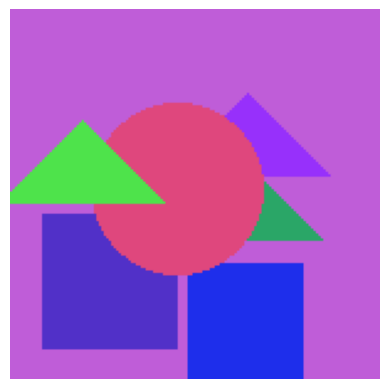

In [30]:
create_image_shapes(size=(150,150), num_shapes=6, save=False)

**50x50 Real Image Data**  
loaded image resolution as described in file name.

In [31]:
# img_pil = Image.open("Images\school_supplies_100x100.jpg")
# img_pil = Image.open("Images\coaster2_50x50.jpg")
# img_pil = Image.open("Images\matches2_crop_50x50.jpg")
# img_pil = Image.open("Images\cup2_50x50.jpg")
# img_pil = Image.open("Images\gloves_black_50x50.jpg")
# img_pil = Image.open("Images\gloves_blue_50x50.jpg")

<div class="alert alert-block alert-success">

----------------------------------
# PROCESS

In [32]:
#collect garbage manually
#output shows freed variable count
gc.collect()
all_summary_results = []
img_set = []

Channel Shape =  (50, 50)
Pixel [2,2] RGB =  221 , 221 , 221
Pixel [22,9] RGB =  225 , 225 , 225
Pixel [45,22] RGB =  237 , 237 , 237
Min red:  107    | Min green:  106    | Min blue:  104
Max red:  240  | Max green:  239  | Max blue:  239


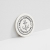

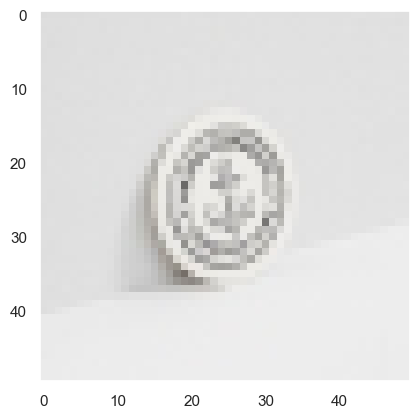

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()
 - sorted ascending


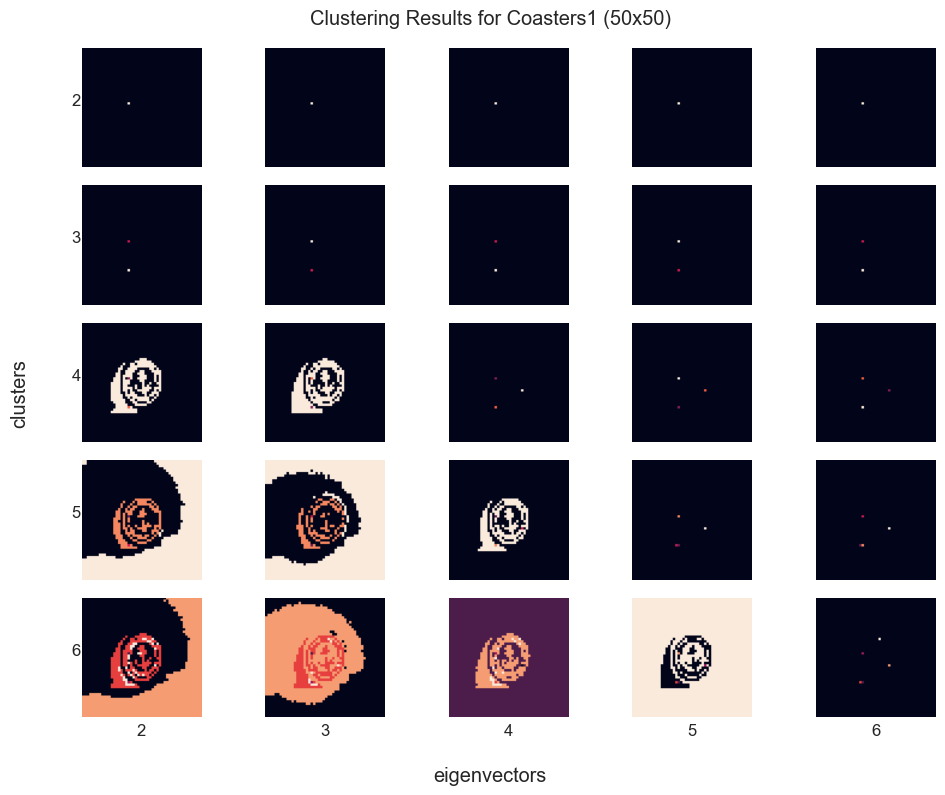

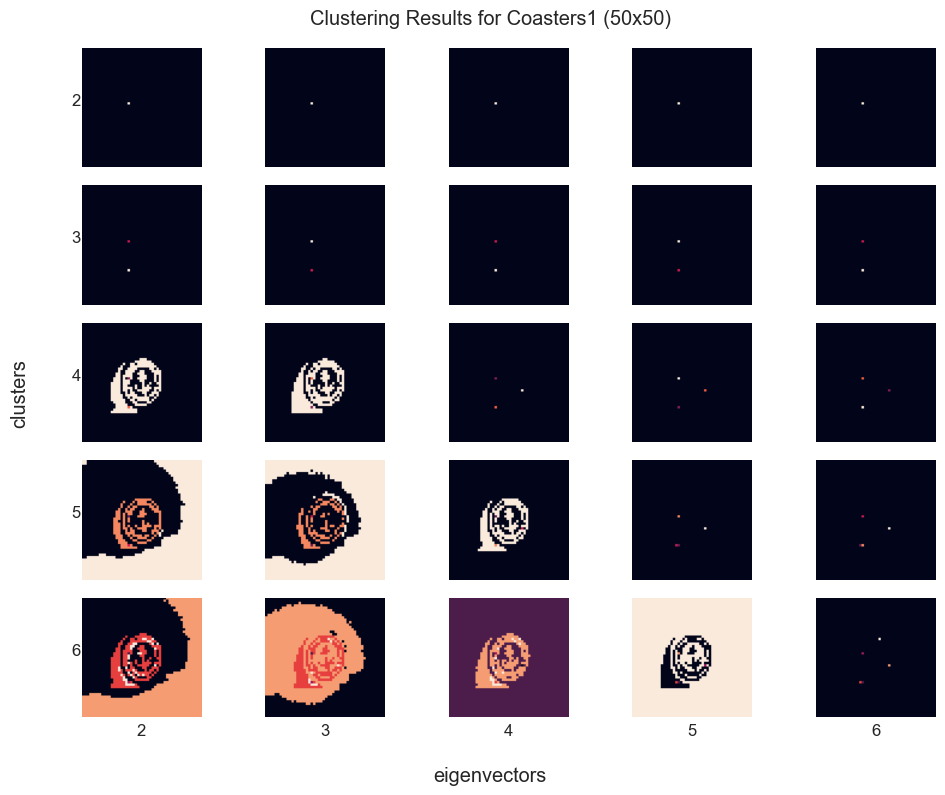


-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.001599360000000    V=k: 0.001599360000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.000004316544000    V=k: 0.000004316544000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 4 | V=2: 0.000003630641971    V=k: 0.000000016364339   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 5 | V=2: 0.000007412121600    V=k: 0.000000000079872   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 6 | V=2: 0.000001901958129    V=k: 0.000000000000477   2nd Eigenvector performed BETTER than k-th eigenvector.

-----------------Averages Across All K For Each Eigenvector Column-----------------
[0.0003233242531400897, 0.0003227657753032217, 0.00032074223600127874, 0.00032073861763982876, 0.00032073859773760046, 0.00032073859773760046]
	Note 1: last column corresponds to the diagonal k.
 	Note 2: colum

In [47]:
gc.collect()
img_pil = Image.open("Images\coaster1_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Coasters1 (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="coasters1",
                                                          lower_triangular=False, save=False)
all_summary_results.append(summary_stats)

Channel Shape =  (50, 50)
Pixel [2,2] RGB =  224 , 224 , 224
Pixel [22,9] RGB =  67 , 65 , 70
Pixel [45,22] RGB =  237 , 237 , 237
Min red:  49    | Min green:  48    | Min blue:  46
Max red:  246  | Max green:  245  | Max blue:  247


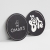

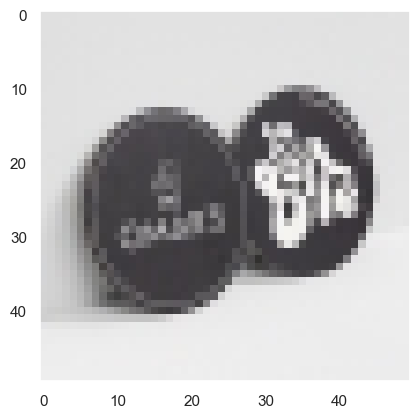

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()
 - sorted ascending


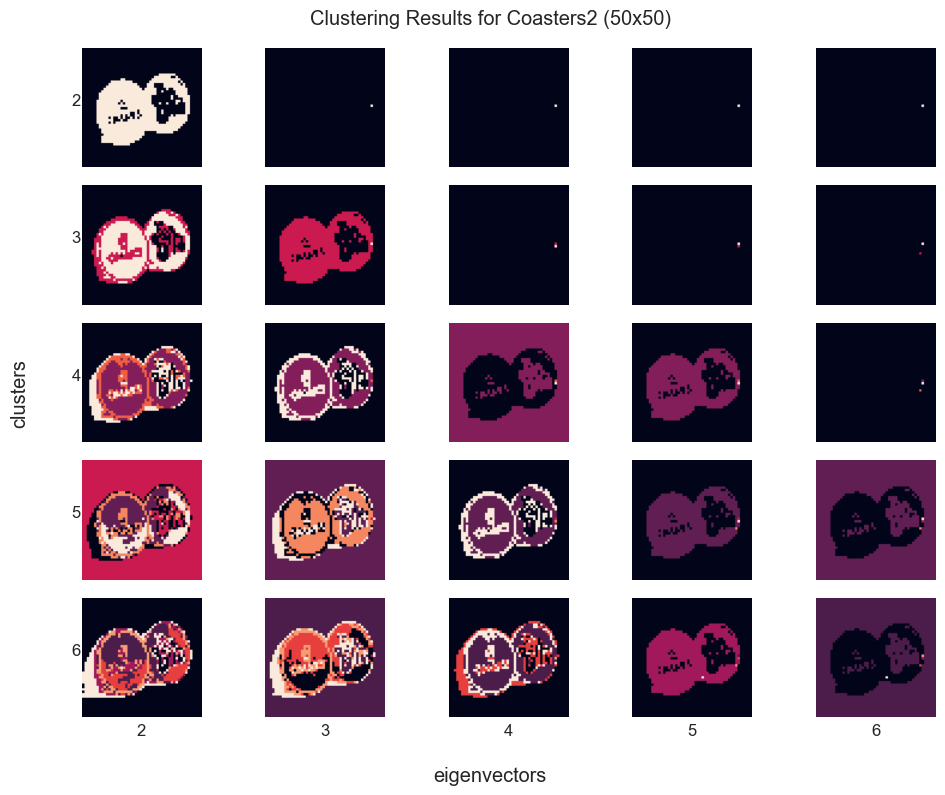

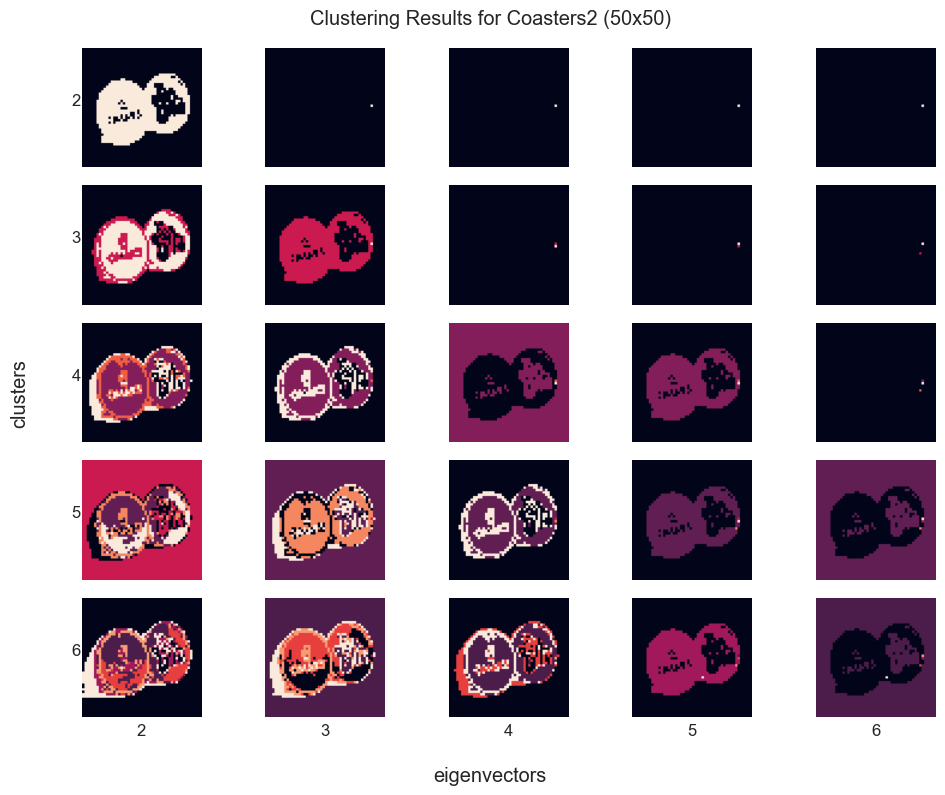


data saved successfully as Measurements/Coasters2_variance.csv

data saved successfully as Measurements/Coasters2_variance_avg.csv

data saved successfully as Measurements/Coasters2_variance_avg_lower.csv

data saved successfully as Measurements/Coasters2_balance.csv

data saved successfully as Measurements/Coasters2_balance_avg.csv

data saved successfully as Measurements/Coasters2_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.808506240000000    V=k: 0.808506240000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.473068118016000    V=k: 0.002183639040000   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.256268936360755    V=k: 0.000008269889536   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 5 | V=2: 0.158080739235840    V=k: 0.000000040322880   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 6 | V

In [48]:
gc.collect()
img_pil = Image.open("Images\coaster2_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Coasters2 (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Coasters2",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)

Channel Shape =  (50, 50)
Pixel [2,2] RGB =  55 , 97 , 57
Pixel [22,9] RGB =  46 , 96 , 47
Pixel [45,22] RGB =  217 , 179 , 130
Min red:  34    | Min green:  76    | Min blue:  26
Max red:  235  | Max green:  227  | Max blue:  191


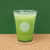

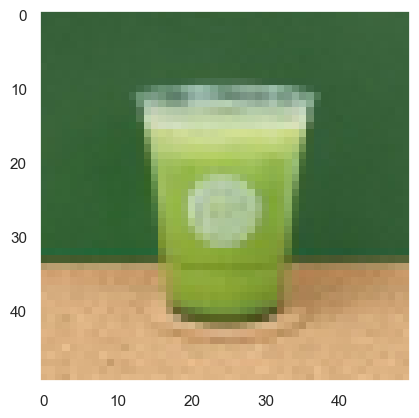

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



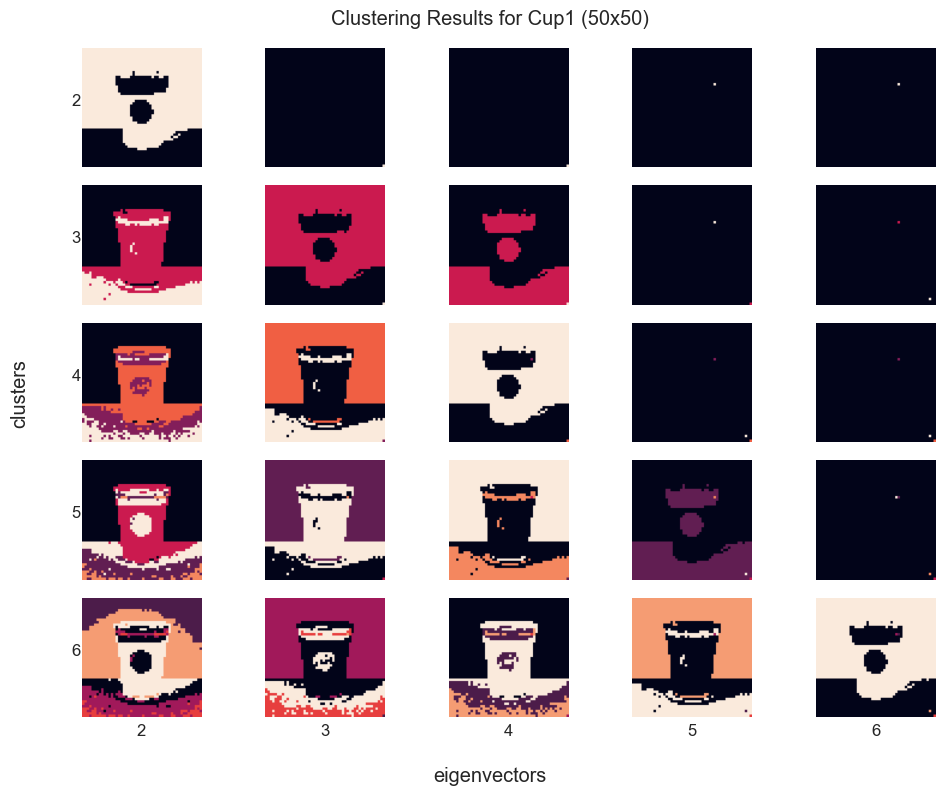


data saved successfully as results and figures/measurements/Cup1_variance.csv

data saved successfully as results and figures/measurements/Cup1_variance_avg.csv

data saved successfully as results and figures/measurements/Cup1_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Cup1_balance.csv

data saved successfully as results and figures/measurements/Cup1_balance_avg.csv

data saved successfully as results and figures/measurements/Cup1_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.909519360000000    V=k: 0.909519360000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.794212024320000    V=k: 0.002454192000000   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.503833710565786    V=k: 0.000009292165939   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 5 | V=2: 0.199331837583872    V=k:

In [29]:
gc.collect()
img_pil = Image.open("Images\cup1_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Cup1 (50x50)', save_individual=False, save_set=True)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Cup1",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)


Channel Shape =  (50, 50)
Pixel [2,2] RGB =  102 , 53 , 59
Pixel [22,9] RGB =  98 , 43 , 48
Pixel [45,22] RGB =  212 , 167 , 125
Min red:  70    | Min green:  38    | Min blue:  24
Max red:  230  | Max green:  233  | Max blue:  192


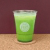

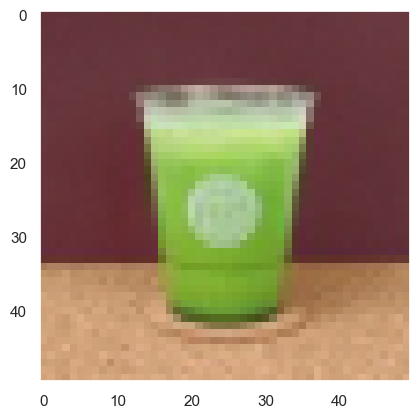

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



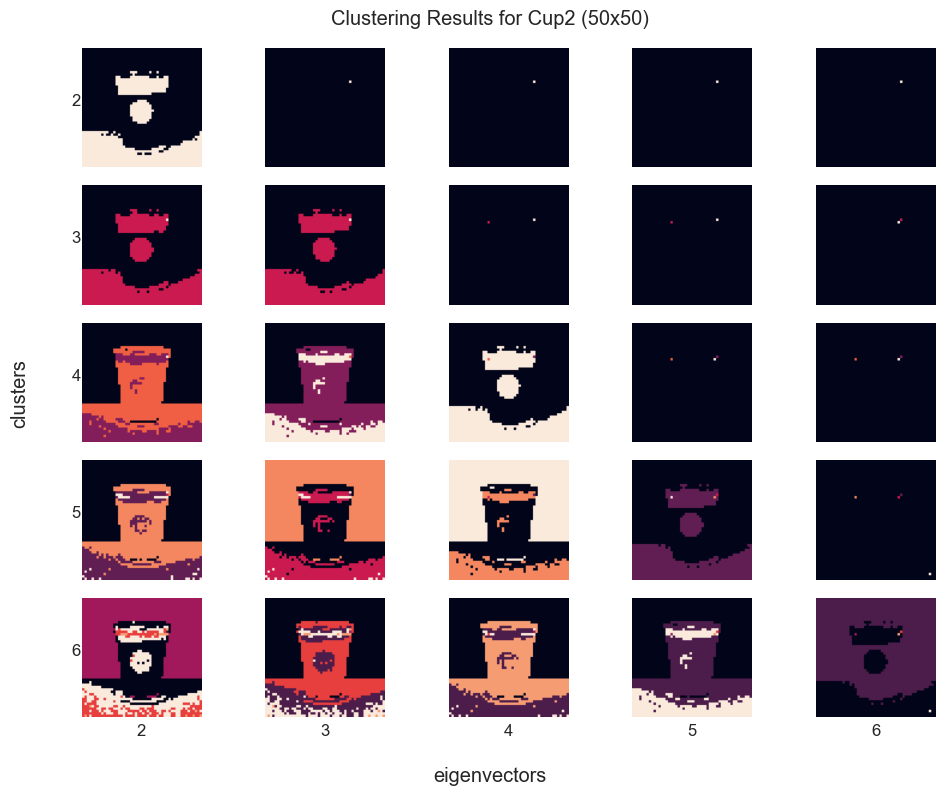


data saved successfully as results and figures/measurements/Cup2_variance.csv

data saved successfully as results and figures/measurements/Cup2_variance_avg.csv

data saved successfully as results and figures/measurements/Cup2_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Cup2_balance.csv

data saved successfully as results and figures/measurements/Cup2_balance_avg.csv

data saved successfully as results and figures/measurements/Cup2_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.851312640000000    V=k: 0.851312640000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.002337738624000    V=k: 0.002308780800000   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.003001320977203    V=k: 0.000008769765376   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 5 | V=2: 0.000440486088000    V=k:

In [30]:
gc.collect()
img_pil = Image.open("Images\cup2_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Cup2 (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Cup2",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)


Channel Shape =  (50, 50)
Pixel [2,2] RGB =  232 , 232 , 232
Pixel [22,9] RGB =  0 , 0 , 0
Pixel [45,22] RGB =  167 , 171 , 172
Min red:  0    | Min green:  0    | Min blue:  0
Max red:  255  | Max green:  242  | Max blue:  236


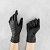

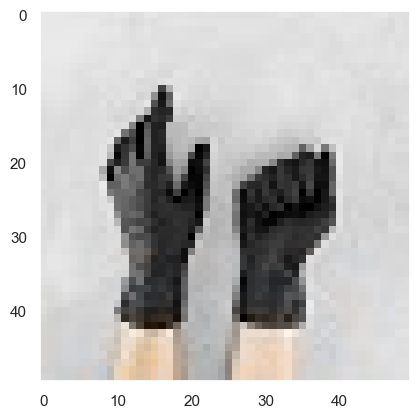

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



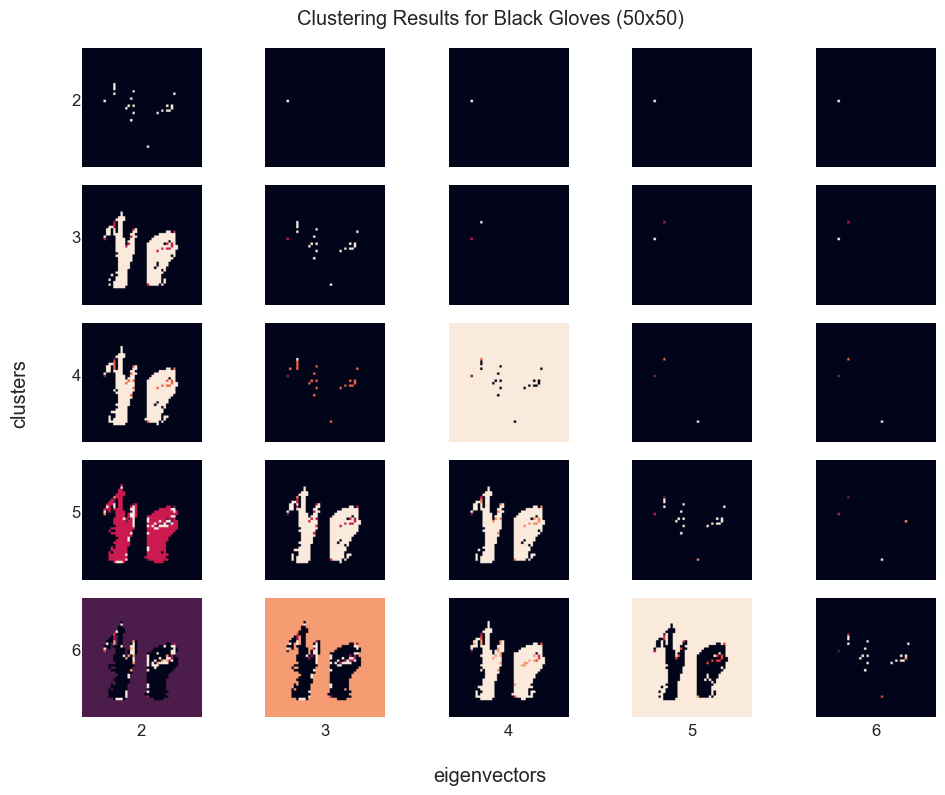


data saved successfully as results and figures/measurements/Black Gloves_variance.csv

data saved successfully as results and figures/measurements/Black Gloves_variance_avg.csv

data saved successfully as results and figures/measurements/Black Gloves_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Black Gloves_balance.csv

data saved successfully as results and figures/measurements/Black Gloves_balance_avg.csv

data saved successfully as results and figures/measurements/Black Gloves_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.033317760000000    V=k: 0.033317760000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.022554951552000    V=k: 0.000085674240000   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.000205371998208    V=k: 0.000000308681114   2nd Eigenvector performed BETTER than k-th eigenve

In [31]:
gc.collect()
img_pil = Image.open("Images\gloves_black_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Black Gloves (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Black Gloves",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)


Channel Shape =  (50, 50)
Pixel [2,2] RGB =  235 , 235 , 235
Pixel [22,9] RGB =  98 , 157 , 223
Pixel [45,22] RGB =  214 , 214 , 212
Min red:  0    | Min green:  71    | Min blue:  128
Max red:  236  | Max green:  236  | Max blue:  255


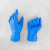

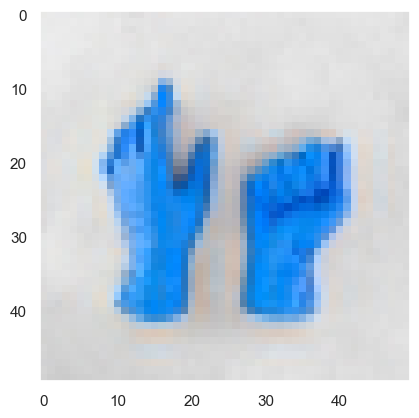

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



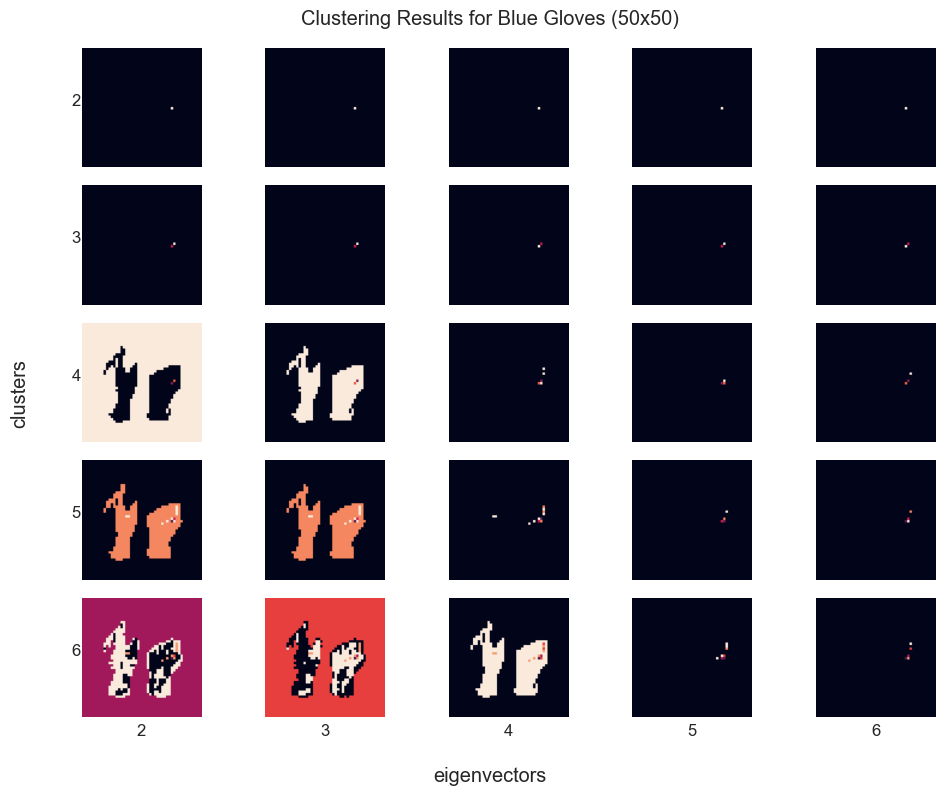


data saved successfully as results and figures/measurements/Blue Gloves_variance.csv

data saved successfully as results and figures/measurements/Blue Gloves_variance_avg.csv

data saved successfully as results and figures/measurements/Blue Gloves_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Blue Gloves_balance.csv

data saved successfully as results and figures/measurements/Blue Gloves_balance_avg.csv

data saved successfully as results and figures/measurements/Blue Gloves_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.001599360000000    V=k: 0.001599360000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.000004316544000    V=k: 0.000004316544000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 4 | V=2: 0.000005849166643    V=k: 0.000000049053696   2nd Eigenvector performed BETTER than k-th eigen

In [32]:
gc.collect()
img_pil = Image.open("Images\gloves_blue_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = gray.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Blue Gloves (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Blue Gloves",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)

Channel Shape =  (50, 50)
Pixel [2,2] RGB =  151 , 100 , 99
Pixel [22,9] RGB =  250 , 244 , 230
Pixel [45,22] RGB =  208 , 159 , 101
Min red:  9    | Min green:  16    | Min blue:  11
Max red:  255  | Max green:  250  | Max blue:  237


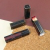

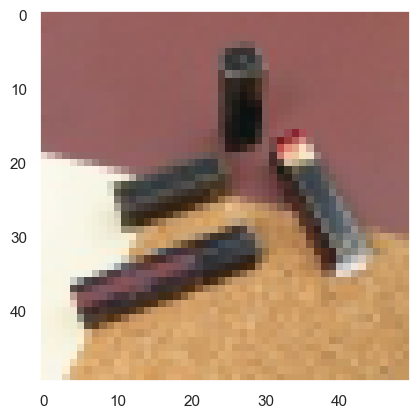

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



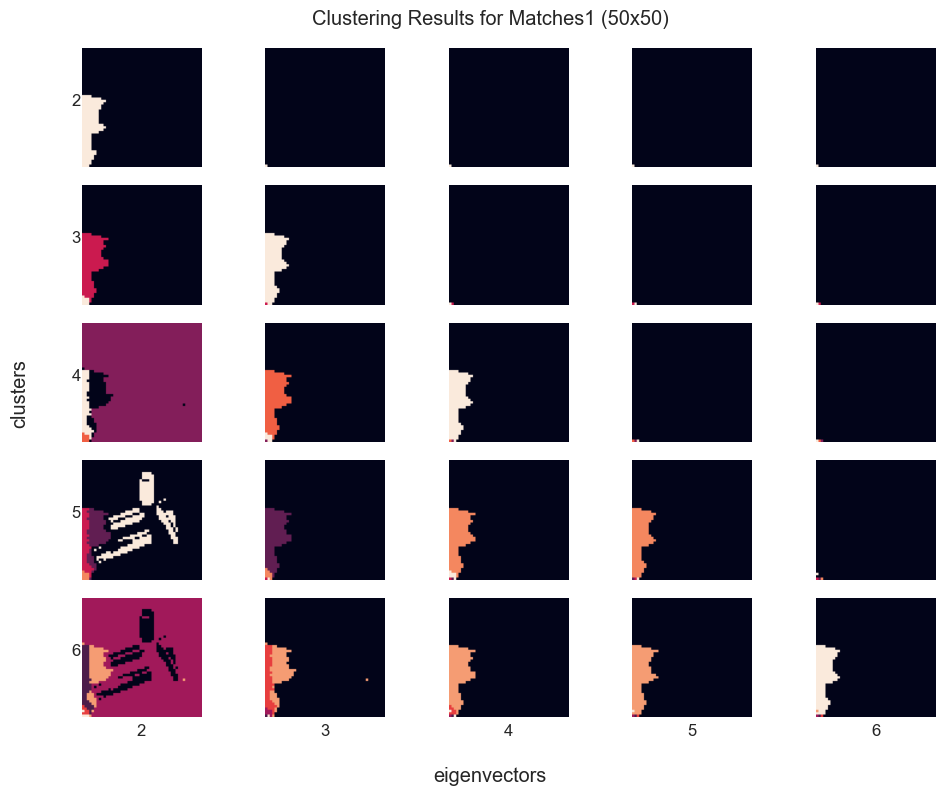


data saved successfully as results and figures/measurements/Matches1_variance.csv

data saved successfully as results and figures/measurements/Matches1_variance_avg.csv

data saved successfully as results and figures/measurements/Matches1_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Matches1_balance.csv

data saved successfully as results and figures/measurements/Matches1_balance_avg.csv

data saved successfully as results and figures/measurements/Matches1_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.274096000000000    V=k: 0.274096000000000   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.007769502720000    V=k: 0.000747090432000   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.001643831623680    V=k: 0.000002818257715   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 5 | V=2: 0

In [33]:
gc.collect()
img_pil = Image.open("Images\matches1_crop_50x50.jpg")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Matches1 (50x50)', save_individual=False, save_set=False)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Matches1",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)

In [34]:
# gc.collect()
# img_pil = Image.open("Images\matches2_crop_50x50.jpg")
# img_set.append(img_pil)

# red, green, blue = img_pil.split()
# red = img_as_ubyte(red)
# green = img_as_ubyte(green)
# blue = img_as_ubyte(blue)
# gray = np.array(img_pil.convert('L')).astype(np.uint8)
# rows,cols = red.shape
# dist_matrix = np.zeros((rows,cols))

# #specify color mode
# mode = 'rgb'
# # mode = 'gray'

# if mode == 'gray':
# #     display_initial_image_info(gray, display_heatmap = False)
#     value_adj = value_adjacency(gray, display=False, save=False)
# elif mode == 'rgb':
#     display_initial_image_info(red, green, blue, display_heatmap = False)
#     value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
# dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
# complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
# D, L = compute_DL(complete_adj, display=False, save=False)
# values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# # check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
# algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

# #FIGURE 1
# # figure1_eigenvector_scatter(vectors)

# #FIGURE SET 2
# cluster_max = 6
# results_set = []
# for k in range(cluster_max):
#     if k==0 or k==1:
#         continue
#     vector_test_result_set = build_cluster_figures_for_vectors(k=k, min_vectors=0, max_vectors=cluster_max, label_each=False, display=False)
#     results_set.append(vector_test_result_set)
# display_result_set(results_set, 'Matches2 (50x50)', save_individual=False, save_set=False)

# #GATHER CLUSTERING STATISTICS
# balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
#                                                           max_k=max_clusters, fileName="Matches2",
#                                                           lower_triangular=True, save=True)
# all_summary_results.append(summary_stats)

#### Generated Shapes

Channel Shape =  (150, 150)
Pixel [2,2] RGB =  0 , 0 , 0
Pixel [22,9] RGB =  0 , 0 , 0
Pixel [45,22] RGB =  248 , 109 , 123
Min red:  0    | Min green:  0    | Min blue:  0
Max red:  248  | Max green:  250  | Max blue:  248


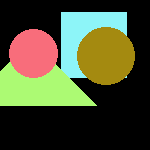

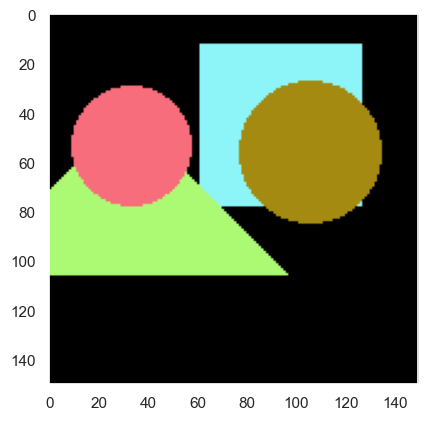

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



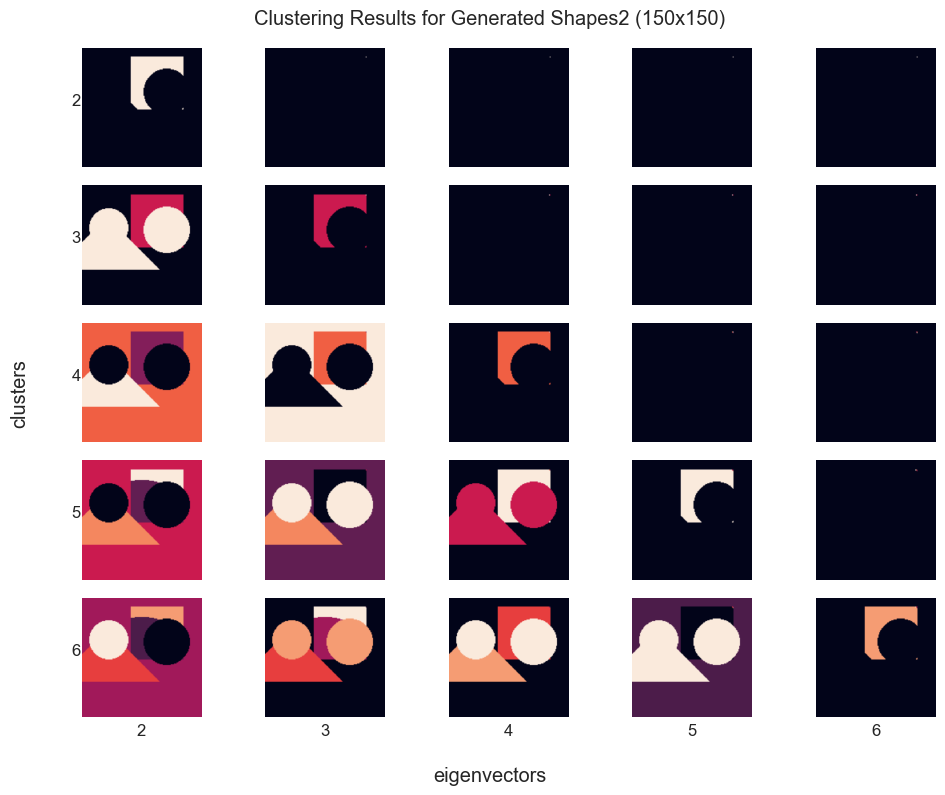


data saved successfully as results and figures/measurements/Generated Shapes2_variance.csv

data saved successfully as results and figures/measurements/Generated Shapes2_variance_avg.csv

data saved successfully as results and figures/measurements/Generated Shapes2_variance_avg_lower.csv

data saved successfully as results and figures/measurements/Generated Shapes2_balance.csv

data saved successfully as results and figures/measurements/Generated Shapes2_balance_avg.csv

data saved successfully as results and figures/measurements/Generated Shapes2_balance_avg_lower.csv

-----------------Resulting Balances For 2nd Eigenvectors & Kth Eigenvectors-----------------
FOR K = 2 | V=2: 0.336463043950617    V=k: 0.336463043950617   2nd Eigenvector performed EQUIVALENTLY to the k-th eigenvector.
FOR K = 3 | V=2: 0.472169752817778    V=k: 0.000100890524444   2nd Eigenvector performed BETTER than k-th eigenvector.
FOR K = 4 | V=2: 0.339881853939358    V=k: 0.000000042494793   2nd Eigenvector perf

In [35]:
gc.collect()
img_pil = Image.open("generated_shapes2_150x150.png")
img_set.append(img_pil)

red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'

if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
# figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
max_clusters = 6
test_set_labels = perform_eigenvector_cluster_tests(vectors, (rows,cols), min_k=2, max_k=max_clusters, min_v=2, max_v=max_clusters)
test_set_plots = retrieve_all_cluster_plots(test_set_labels)
display_clustering_tests(test_set_labels, test_set_plots, 'Generated Shapes2 (150x150)',  save_individual=False, save_set=True)

#GATHER CLUSTERING STATISTICS
balance, summary_stats = calculate_clustering_performance(test_set_labels, min_k=2,
                                                          max_k=max_clusters, fileName="Generated Shapes2",
                                                          lower_triangular=True, save=True)
all_summary_results.append(summary_stats)

## RECORD & SAVE SUMMARY RESULTS

In [36]:
save_data_csv(all_summary_results, "results and figures/measurements/all summary results lower")
# save_data_csv(all_summary_results, "results and figures/measurements/all summary results")`


data saved successfully as results and figures/measurements/all summary results lower.csv


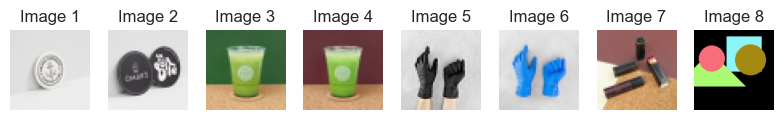

In [61]:
titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8']
# plot_rowsxcols_style3(img_set, 4, 2, titles=titles, size=(4,8), fileName='Figure 3 Vertical', save=True)
# plot_rowsxcols_style3(img_set, 2, 4, titles=titles, size=(8,4), fileName='Figure 3 Horizontal', save=True)
plot_rowsxcols_style3(img_set, 1, 8, titles=titles, size=(8,1.25), fileName='Figure 3 Wide', save=True)

## EXTRA TESTING

Min red:  0    | Min green:  7    | Min blue:  0
Max red:  255  | Max green:  255  | Max blue:  255


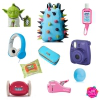

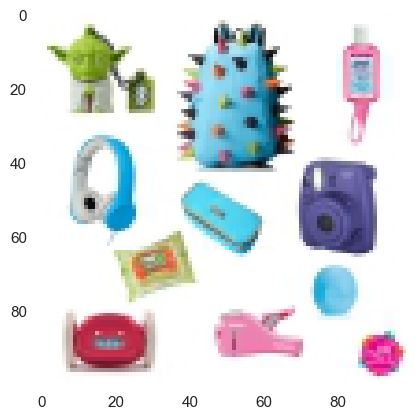

The Laplacian is confirmed to be symmetric.

Generating Vectors with Properties...
 - eigh()

L and the reconstructed L are CLOSE. Within absolute tolerance =  1e-08 
The two arrays can be broadcasted to be the same shape, and all elements are tolerably similar.



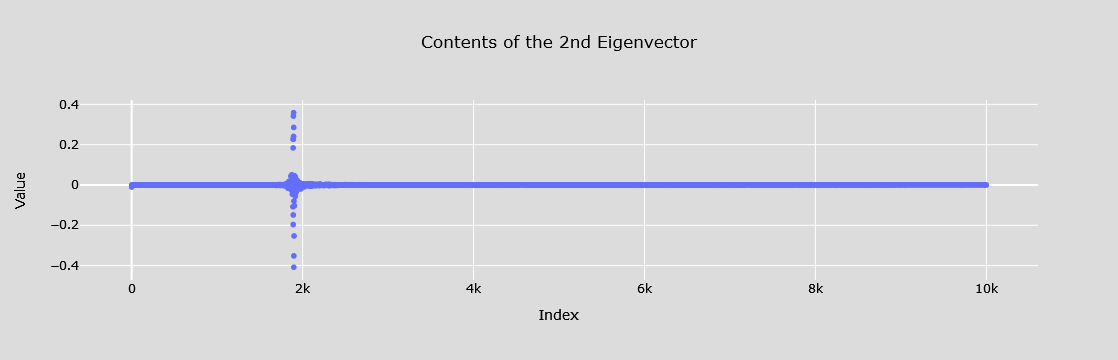

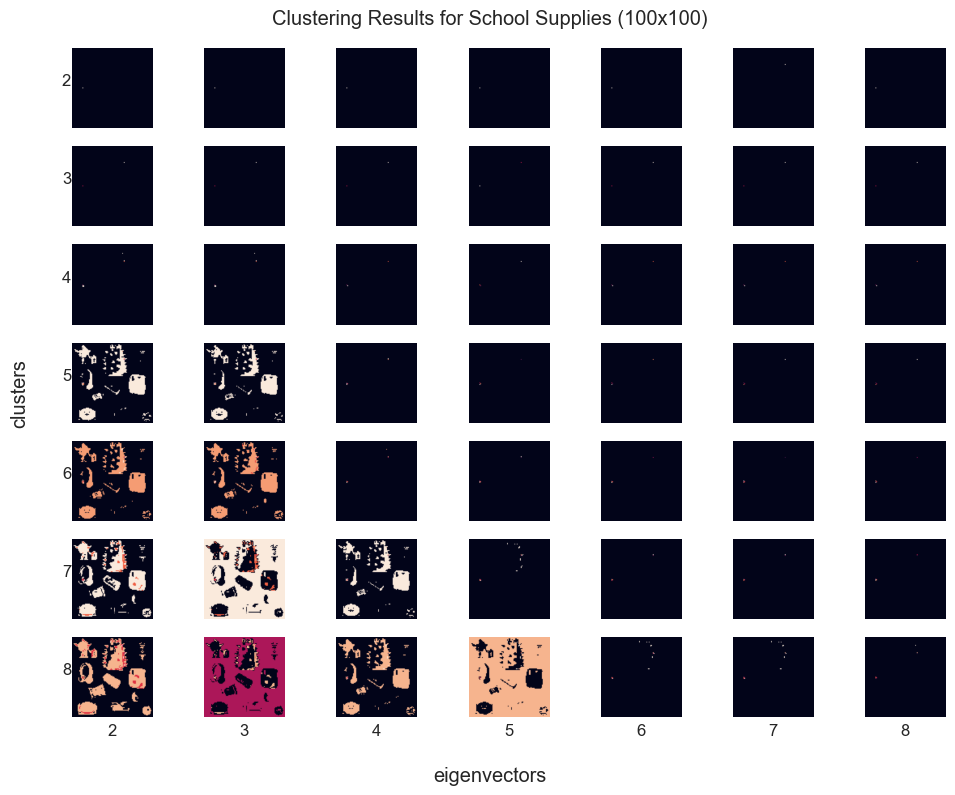

In [758]:
gc.collect()
img_pil = Image.open("Images\school_supplies_100x100.jpg")
red, green, blue = img_pil.split()
red = img_as_ubyte(red)
green = img_as_ubyte(green)
blue = img_as_ubyte(blue)
gray = np.array(img_pil.convert('L')).astype(np.uint8)
rows,cols = red.shape
dist_matrix = np.zeros((rows,cols))

#specify color mode
mode = 'rgb'
# mode = 'gray'
 
if mode == 'gray':
#     display_initial_image_info(gray, display_heatmap = False)
    value_adj = value_adjacency(gray, display=False, save=False)
elif mode == 'rgb':
    display_initial_image_info(red, green, blue, display_heatmap = False)
    value_adj = value_adjacency(red, green, blue, version=1, display=False, save=False) #faster version    
dist_adj = distance_adjacency(dist_matrix, version=2, display=False, save=False)
complete_adj = combine_adjacency(value_adj, dist_adj, alpha = .8, display=False, save=False)
D, L = compute_DL(complete_adj, display=False, save=False)
values, vectors, mod_status = generate_eigens(L, sort=True, normalize=False, display=False, save=False)
# check_eigenvector_validity(values, vectors, mod_status) #only run on unsorted unnormalized vectors as a sanity-check
algebraic_connectivity = vectors[:,1:2].reshape(rows, cols)

#FIGURE 1
figure1_eigenvector_scatter(vectors)

#FIGURE SET 2
cluster_max = 6
results_set = []
for k in range(cluster_max):
    if k==0 or k==1:
        continue
    vector_test_result_set = build_cluster_figures_for_vectors(k=k, min_vectors=0, max_vectors=cluster_max, label_each=False, display=False)
    results_set.append(vector_test_result_set)
display_result_set(results_set, 'School Supplies (100x100)', save_individual=False,
                                                          lower_triangular=True, save_set=False)

### Cluster Statistics & Location of Abnormal Data

In [ ]:
groups = identify_labeled_groups(results, k, 1)

In [ ]:
print(pil_to_numpy(pilImg)[22][9])
print(pil_to_numpy(pilImg)[41][27])

In [ ]:
# # (22+1)*(9+1)= 230 -1 = 229 <- location of the 230th comparison of the 
# print(complete_adj[225,:])
# print(complete_adj[229,:])

In [ ]:
# 1D_index = row_number * number_of_columns + column_number

#uncommon values at row 1109 (associated with 22,9) and 2077 (associated with 41,27)
print("Row 1109 associated with (22,9)")
print(complete_adj[1109, :])
print("SUM of Row 1109: ", np.sum(complete_adj[1109,:]))

print("\nRows surrounding 1109 associated with (22,9)")
print(complete_adj[1107:1112, :])
print("SUM of Row 1110 =", np.sum(complete_adj[1110,:]), "and 1108 =", np.sum(complete_adj[1108,:]))

print("\nRow associated with (41,27)")
print(complete_adj[2077, :])
print("SUM of Row 2077: ", np.sum(complete_adj[2077,:]))

print("\nRows surrounding 2077 associated with (41,27)")
print(complete_adj[2075:2080, :])
print("SUM of Row 2076 =", np.sum(complete_adj[2076,:]), "and 2078 =", np.sum(complete_adj[2078,:]))

In [ ]:
print(len(complete_adj[1109, :]))

In [ ]:
def find_outliers(arr, n=2, display=False):
    arr = np.array(arr)

    # Calculate mean & std
    mean = np.mean(arr)
    std_dev = np.std(arr)
    print(std_dev)

    # Define lower & upper bounds within n stdeviations
    lower_bound = mean - n * std_dev
    upper_bound = mean + n * std_dev

    # Find the indices of values outside bounds
    outlier_indices = [(i, j) for i, row in enumerate(arr) for j, value in enumerate(row) if value < lower_bound or value > upper_bound]
    
    if display:
        print(outlier_indices)
        
    return outlier_indices

In [ ]:
outlier_indices = find_outliers(complete_adj, 6, False)
print(len(outlier_indices))

for i, (row, col) in enumerate(outlier_indices, start=1):
    value = complete_adj[row][col]
    if value != 0:
        print(f"{i}. At index ({row}, {col}): {value}")
    
# print(outlier_indices)

#### KMEANS Fit_Predict on Complete_adj


Fitted Labels on Adjacency: [0 0 0 ... 3 3 3]
Fitted Labels - Array Formatted:
 [[0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 ...
 [6 6 6 ... 3 3 3]
 [6 6 6 ... 3 3 3]
 [6 6 6 ... 3 3 3]]

data saved successfully as kmeans_labels_from_adjacency.csv


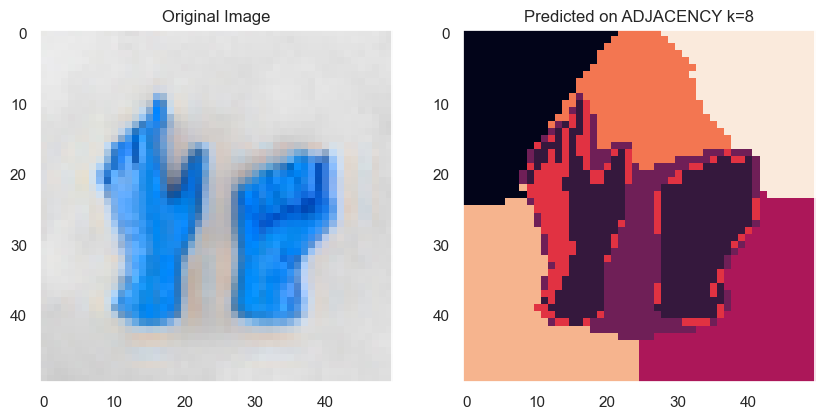

In [30]:
k=8
kmeans_model = KMeans(n_clusters=k, init='k-means++')                 

#FIT ON ADJACENCY MATRIX (complete_adj)
# kmeans_model.fit_predict(complete_adj[:,:k])
kmeans_model.fit_predict(complete_adj)  
labels = kmeans_model.labels_
print("\nFitted Labels on Adjacency:", labels)
labels = labels.reshape(rows,cols)
print("Fitted Labels - Array Formatted:\n", labels)

# Save data to file
save_data_csv(labels.reshape(rows, cols), "kmeans_labels_from_adjacency")

# # FOR COLOR
segmented = np.zeros_like(red)
for i in range(k):
    segmented[labels == i] = np.median(red[labels == i], axis=0)

# # FOR GRAY
# segmented = np.zeros((rows,cols))
# for i in range(k):
#     segmented[labels == i] = np.median(np.array(pilImg)[labels == i], axis=0)
#     print(segmented[labels==i])

_=display_clustering(pilImg, labels.reshape(rows, cols), labels, centers, "Original Image", f"Predicted on ADJACENCY k={k}", 'gray')

# CODE BELOW THIS POINT IS LESS RELEVENT

#### Transposed Prediction

In [ ]:
# vectorsT = vectors.T
# k_means_model = KMeans(n_clusters=k, init=centers)     
# k_means_model.fit(vectorsT[:,:k])                        #fit
# labels_T = k_means_model.labels_

# print("\nPre-Predict Labels on TRANSFORMED vectors:", labels_T)
# print("Pre-Predict Labels - Array Formatted:\n", labels_T.reshape(rows, cols))

# prediction_labels_T = k_means_model.predict(vectorsT[:,:k])  #predict
# print("\nPost-Predict Labels on TRANSFORMED vectors: ", np.array(prediction_labels_T)) 
# print("Post-Predict Labels - Array Formatted:\n", np.array(prediction_labels_T).reshape(rows, cols))

# # Get the cluster centers and the labels of the data points
# centers_T = k_means_model.cluster_centers_

# # Plot the original image and the segmented image side by side
# fig, ax = plt.subplots(1, 2, figsize=(4, 2))
# ax[0].imshow(stackedRGB)
# ax[0].set_title('Original Image')
# ax[1].imshow(prediction_labels_T.reshape(rows,cols))
# ax[1].set_title('Predicted Image')
# plt.show()

#### Compare to semi-automated procedure 
note: segment_image partially written by me. see def_file_spectral for details

In [ ]:
# stackedRGB = rgb_to_3Darray(red, green, blue)
# segmented3, labels3 = segment_image(img_np, k)

# print("\nLABELS:\n", labels3)
# # print("\n\nSEGMENTED:\n",segmented3)

# # Plot the original image and the segmented image side by side
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(img_np)
# ax[0].set_title('Original Image')
# ax[1].imshow(segmented3)
# ax[1].set_title('Segmented Image')
# plt.show()

#### Compare to AUTOMATED package

In [ ]:
# SpectralClustering??
# help(SpectralClustering)

[[0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 [0 0 0 ... 7 7 7]
 ...
 [3 3 3 ... 6 6 6]
 [3 3 3 ... 6 6 6]
 [3 3 3 ... 6 6 6]]


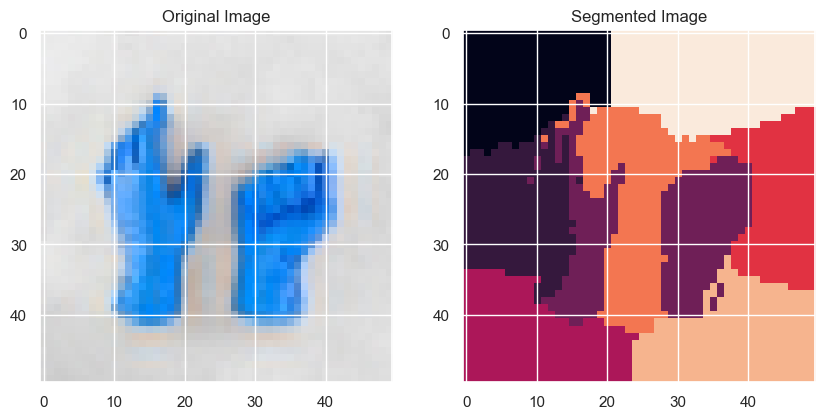

In [45]:
k=8
# Stack the arrays to create a 3D array
stackedRGB = np.stack([red, green, blue], axis=-1)

clustering = SpectralClustering(n_clusters=k, affinity='precomputed')
labels_flat = clustering.fit_predict(complete_adj)
labels4 = labels_flat.reshape(rows, cols)
print(labels4) 

# segmented = np.zeros_like(red)
# for i in range(k):
#     segmented[labels4 == i] = np.median(green[labels4 == i], axis=0)
    
# Plot the original image and the segmented image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(stackedRGB)
ax[0].set_title('Original Image')
ax[1].imshow(labels4)
ax[1].set_title('Segmented Image')
plt.show()

#### Attempt at RAW rgb_adj data fed into automated SpectralClustering

In [ ]:
# Create an instance of the SpectralClustering class with default parameters
clustering = SpectralClustering(n_clusters=k)
# Fit the clustering model to the data
clustering.fit(value_adj)

# Get the predicted cluster labels for each point in the dataset
labels5 = clustering.labels_

# Print the cluster labels
print(labels5)

# Create an empty array to store the segmented image
segmented2 = np.zeros_like(value_adj)

# Loop over the clusters and assign the median blue value to each pixel in the corresponding cluster
for i in range(k):
    segmented2[labels5 == i] = np.median(value_adj[labels5 == i], axis=0)
    
# Plot the original image and the segmented image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(value_adj)
ax[0].set_title('Blue Channel')
ax[1].imshow(segmented2)
ax[1].set_title('Segmented Image')
plt.show()